In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
my_data_dir = "C:\\Users\\SURIYA\\Documents\\TF Projects\\Landmine Detection\\images"

In [3]:
import os

In [4]:
os.listdir(my_data_dir)

['test', 'train']

In [5]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [6]:
os.listdir(test_path)

['Landmine', 'Normal']

In [7]:
os.listdir(train_path)

['Landmine', 'Normal']

In [8]:
os.listdir(train_path+'\\Landmine')[0]

'1.jpg'

In [9]:
land_mine = train_path+'\\Landmine'+'\\1.jpg'

In [10]:
land_mine

'C:\\Users\\SURIYA\\Documents\\TF Projects\\Landmine Detection\\images\\train\\\\Landmine\\1.jpg'

In [11]:
ld_img = imread(land_mine)

In [12]:
ld_img

array([[[ 65,  64,  59],
        [ 71,  70,  65],
        [ 68,  67,  62],
        ...,
        [131, 128, 113],
        [124, 117, 101],
        [122, 113,  96]],

       [[ 81,  82,  77],
        [ 84,  85,  80],
        [ 77,  76,  71],
        ...,
        [128, 131, 124],
        [121, 122, 114],
        [119, 119, 109]],

       [[ 94,  95,  90],
        [ 98,  99,  94],
        [ 88,  89,  84],
        ...,
        [115, 131, 131],
        [114, 128, 128],
        [114, 126, 124]],

       ...,

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

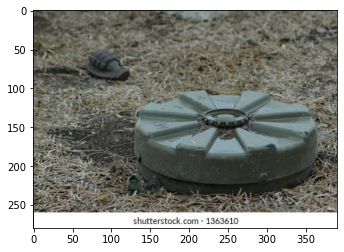

In [13]:
plt.imshow(ld_img)

In [14]:
ld_img.shape

(280, 391, 3)

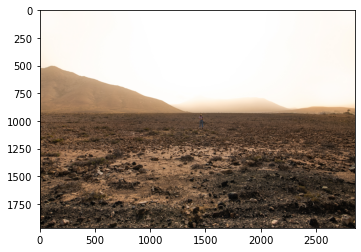

In [15]:
normal_path = train_path+'\\Normal\\'+os.listdir(train_path+'\\Normal')[3]
Normal_img= imread(normal_path)
plt.imshow(Normal_img)

In [16]:
Normal_img.shape

(1968, 2850, 3)

In [17]:
len(os.listdir(train_path+"\\Landmine"))

28

In [18]:
len(os.listdir(train_path+"\\Normal"))

29

In [19]:
way1=[]
way2=[]

for image_filename in os.listdir(test_path+'\\Normal'):
    img = imread(test_path+'\\Normal'+'\\'+image_filename)
    d1,d2,colors = img.shape
    way1.append(d1)
    way2.append(d2)
    

C:\Users\SURIYA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


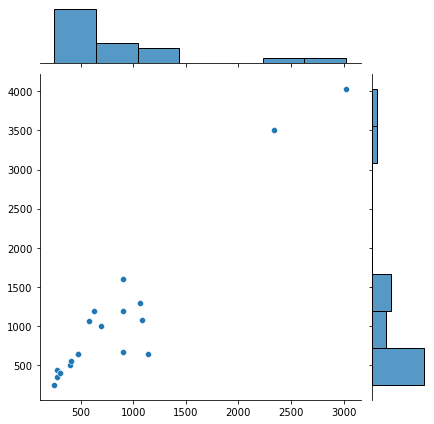

In [20]:
sns.jointplot(way1,way2)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

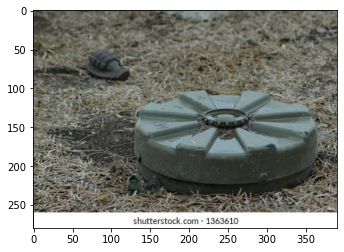

In [23]:
plt.imshow(ld_img)

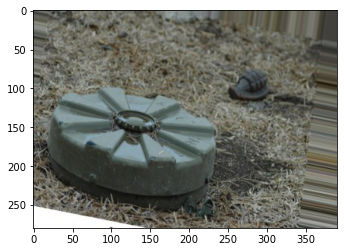

In [24]:
plt.imshow(image_gen.random_transform(ld_img))

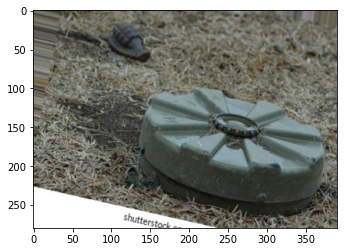

In [25]:
plt.imshow(image_gen.random_transform(ld_img))

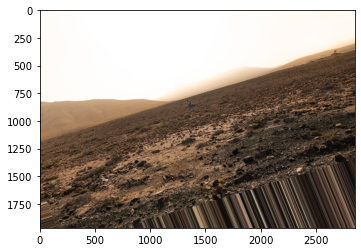

In [26]:
plt.imshow(image_gen.random_transform(Normal_img))

In [27]:
image_gen.flow_from_directory(train_path)

Found 56 images belonging to 2 classes.


In [28]:
image_gen.flow_from_directory(test_path)

Found 26 images belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Conv2D,MaxPooling2D, Flatten

In [30]:
model = Sequential()
image_shape = (130,130,3)

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=82, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.6))



In [31]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 82)        23698     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 82)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 78802)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [35]:

batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 56 images belonging to 2 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 26 images belonging to 2 classes.


In [37]:
train_image_gen.class_indices

{'Landmine': 0, 'Normal': 1}

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 3.0124 - accuracy: 0.5536 - val_loss: 0.5145 - val_accuracy: 0.7692
Epoch 2/20
4/4 [==============================] - 7s 2s/step - loss: 1.4343 - accuracy: 0.4464 - val_loss: 0.7829 - val_accuracy: 0.2308
Epoch 3/20
4/4 [==============================] - 7s 2s/step - loss: 0.6671 - accuracy: 0.5357 - val_loss: 0.6799 - val_accuracy: 0.7308
Epoch 4/20
4/4 [==============================] - 7s 2s/step - loss: 0.6293 - accuracy: 0.6429 - val_loss: 0.5335 - val_accuracy: 0.8846


In [40]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

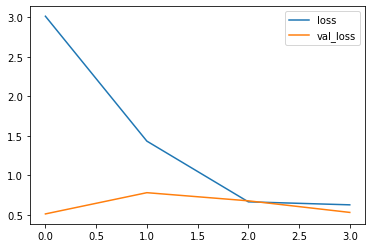

In [41]:
losses[['loss','val_loss']].plot()

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
model.evaluate(test_image_gen)

2/2 [==============================] - 1s 587ms/step - loss: 0.5095 - accuracy: 0.8846


[0.509514570236206, 0.8846153616905212]

In [44]:
from tensorflow.keras.preprocessing import image

In [45]:
pred_probability = model.predict_generator(test_image_gen)

In [46]:
pred_probability

array([[0.35712385],
       [0.22841913],
       [0.20375237],
       [0.48964462],
       [0.28004086],
       [0.6234096 ],
       [0.39996228],
       [0.6482811 ],
       [0.6043889 ],
       [0.5060457 ],
       [0.7157067 ],
       [0.59943396],
       [0.62627625],
       [0.67735547],
       [0.6563314 ],
       [0.6580866 ],
       [0.2737059 ],
       [0.6058133 ],
       [0.59750295],
       [0.5137422 ],
       [0.627015  ],
       [0.67929363],
       [0.6702962 ],
       [0.62542754],
       [0.62040603],
       [0.4727073 ]], dtype=float32)

In [47]:
test_image_gen.classes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [48]:
predictions = pred_probability > 0.5

In [49]:
predictions

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False]])

In [50]:
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.94      0.85      0.89        20

    accuracy                           0.85        26
   macro avg       0.78      0.84      0.80        26
weighted avg       0.87      0.85      0.85        26



In [52]:
confusion_matrix(test_image_gen.classes, predictions)

array([[ 5,  1],
       [ 3, 17]], dtype=int64)

In [53]:
new_img="C:\\Users\\SURIYA\\Downloads\\landmines_0.png"

In [54]:
my_image = image.load_img(new_img,target_size=image_shape)

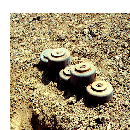

In [55]:
my_image

In [56]:
type(my_image)

PIL.Image.Image

In [57]:
my_image = image.img_to_array(my_image)

In [58]:
type(my_image)

numpy.ndarray

In [59]:
my_image.shape

(130, 130, 3)

In [60]:
my_image = np.expand_dims(my_image, axis=0)

In [61]:
my_image.shape

(1, 130, 130, 3)

In [62]:
model.predict(my_image)

array([[0.]], dtype=float32)

In [63]:
train_image_gen.class_indices

{'Landmine': 0, 'Normal': 1}